In [1]:
import mlrose_hiive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, validation_curve, learning_curve
import warnings
import time
warnings.filterwarnings('ignore')
from random import randint


In [2]:
fit_labels = ['FourPeak', 'ContinuousPeaks', 'Knapsack']
state = [0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1]
l = 110
state = np.array(state)
weights = [48, 8, 34, 13, 12, 23, 21, 45, 17, 26, 12, 28, 25, 21, 26, 40, 8, 11, 21, 13, 25, 17, 46, 29, 19, 3, 12, 7, 42, 29, 30, 14, 24, 9, 48, 3, 22, 49, 9, 44, 14, 37, 37, 40, 41, 35, 12, 46, 38, 41, 19, 18, 7, 29, 18, 25, 37, 44, 4, 25, 19, 13, 25, 12, 6, 13, 2, 30, 37, 15, 3, 33, 36, 47, 16, 23, 47, 34, 37, 4, 49, 32, 48, 36, 15, 48, 3, 37, 39, 11, 46, 35, 23, 46, 41, 49, 24, 7, 47, 6, 8, 22, 28, 32, 49, 8, 45, 31, 3, 46, 20, 46, 30, 8, 41, 42, 11, 38, 13, 4, 11, 49, 17, 18, 22, 46, 5, 10, 17, 24]
values = [4, 6, 5, 9, 4, 8, 5, 1, 1, 6, 6, 7, 4, 4, 1, 8, 8, 6, 8, 8, 1, 6, 2, 6, 5, 7, 9, 8, 9, 4, 8, 1, 3, 2, 2, 4, 5, 3, 7, 1, 1, 1, 3, 6, 2, 4, 7, 7, 9, 4, 9, 7, 2, 5, 9, 3, 1, 1, 2, 2, 5, 6, 1, 6, 6, 6, 9, 1, 7, 5, 3, 2, 9, 4, 1, 4, 8, 1, 4, 8, 4, 6, 8, 2, 4, 3, 2, 6, 2, 6, 1, 5, 3, 2, 8, 2, 4, 2, 8, 1, 6, 6, 1, 2, 7, 4, 9, 8, 2, 6, 5, 6, 4, 7, 2, 8, 7, 9, 6, 1, 8, 6, 9, 7, 7, 1, 5, 9, 3, 8]


In [3]:
def discrete(l, fit, mx, val):
    problem = mlrose_hiive.DiscreteOpt(length = l, fitness_fn = fit, maximize = mx, max_val = val)
    return problem


def annealing(problem, state, decay):
    schedule = mlrose_hiive.ExpDecay(exp_const=decay)

    
    opt = mlrose_hiive.simulated_annealing(problem, schedule = schedule, 
                                           max_attempts=1000, max_iters=4000, init_state=state, curve=True, random_state=10)
    return opt

In [4]:
def fourpeak(state, l, mx, val, decay):
    fitness = mlrose_hiive.FourPeaks(t_pct=0.15)
    problem = discrete(l, fitness, mx, val)
    
    

    
    start = time.time()
    sa = annealing(problem, state, decay)
    sa_t.append(time.time()-start)
    sa_fit.append(sa[1])
    
    



In [5]:
def contpeak(state, l, mx, val, decay):
    fitness = mlrose_hiive.ContinuousPeaks(t_pct=0.15)
    problem = discrete(l, fitness, mx, val)
    
    
    
    start = time.time()
    sa = annealing(problem, state, decay)
    sa_t2.append(time.time()-start)
    sa_fit2.append(sa[1])
    
    
   

In [6]:
def ksack(state, l, mx, val, decay, weights, values):
    
    
    
    fitness = mlrose_hiive.Knapsack(weights, values, 0.6)
    problem = discrete(l, fitness, mx, val)
    
    
    
    
    start = time.time()
    sa = annealing(problem, state, decay)
    sa_t3.append(time.time()-start)
    sa_fit3.append(sa[1])
    
    
   


In [7]:
def plotting(labels, data, rang, x, y, title, file):
    plt.figure()
    for label, arr in zip(labels, data):
        plt.plot(rang, arr, label=label)
    plt.legend()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.savefig(file, dpi = 1200)

In [10]:
sa_fit = []

sa_t = []


sa_fit2 = []

sa_t2= []


sa_fit3 = []

sa_t3= []


for i in [ 0.1, 0.01, 0.001, 0.0001]:
    fourpeak(state, l, True, 2, i)
for i in [ 0.1, 0.01, 0.001, 0.0001]:
    contpeak(state, l, True, 2, i)
for i in [ 0.1, 0.01, 0.001, 0.0001]:
    ksack(state, l, True, 2, i, weights[:l], values[:l])

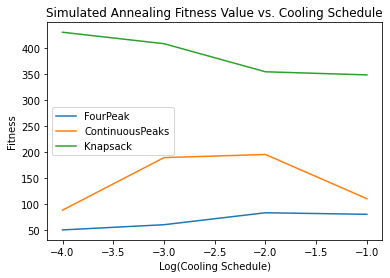

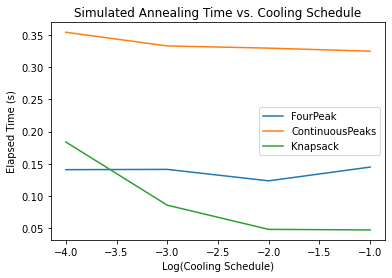

In [12]:
plotting(fit_labels, [sa_fit, sa_fit2, sa_fit3],np.array([ -1, -2, -3, -4]), 
         'Log(Cooling Schedule)', 'Fitness', 'Simulated Annealing Fitness Value vs. Cooling Schedule', 'fp_fit_cool.png')
plotting(fit_labels, [sa_t, sa_t2, sa_t3],np.array([ -1, -2, -3, -4]), 
         'Log(Cooling Schedule)', 'Elapsed Time (s)', 'Simulated Annealing Time vs. Cooling Schedule', 'fp_time_cool.png')



In [14]:
sa_fit, sa_fit2, sa_fit3

([80.0, 83.0, 60.0, 50.0],
 [110.0, 195.0, 189.0, 88.0],
 [348.0, 354.0, 408.0, 430.0])